In [43]:
!pip install control

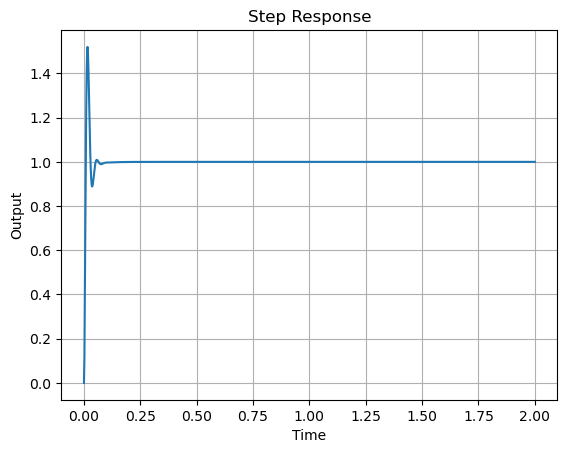

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control

x = 67028.47

# Define the transfer function coefficients
num = [x, 103*x, 1840*x]  # numerator coefficients
den = [1, 363, 360.81 + x , -(430.78-103*x), 1840*x]  # denominator coefficients

# Create the transfer function
G = control.TransferFunction(num, den)

# Generate the step input
t = np.linspace(0, 2, 1000)  # time vector
u = np.ones_like(t)  # step input vector

# Simulate the closed-loop system
t, y = control.step_response(G, T=t, input=u)

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)
plt.show()

The transfer function is :  
        6.703e+04 s^2 + 6.904e+06 s + 1.233e+08
-------------------------------------------------------
s^4 + 363 s^3 + 6.739e+04 s^2 + 6.904e+06 s + 1.233e+08



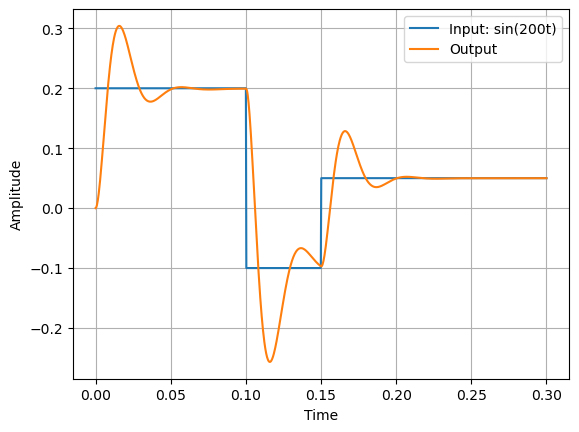

In [12]:
import numpy as np
import control
from control import forced_response
import matplotlib.pyplot as plt

x = 67028.47

# Define the transfer function coefficients
num = [x, 103*x, 1840*x]  # numerator coefficients
den = [1, 363, 360.81 + x , -(430.78-103*x), 1840*x]  # denominator coefficients



# Define the input signal
t = np.linspace(0, 0.3, 1000)  # Time vector
u = np.zeros_like(t)  # Initialize input signal

# Set the input magnitudes
u[t < 0.1] = 0.2  # Magnitude 0.2 until 0.10 seconds
u[(t >= 0.1) & (t < 0.15)] = -0.1  # Magnitude -0.1 from 0.10 to 0.15 seconds
u[t >= 0.15] = 0.05  # Magnitude 0.05 after 0.15 seconds



H = control.tf(num, den)
print("The transfer function is : " ,H)


# Simulate the response
t, y = forced_response(H, T=t, U=u)

# Plot the input and output signals
plt.figure()
plt.plot(t, u, label='Input: sin(200t)')
plt.plot(t, y, label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The transfer function is :  
        6.703e+04 s^2 + 6.904e+06 s + 1.233e+08
-------------------------------------------------------
s^4 + 363 s^3 + 6.739e+04 s^2 + 6.904e+06 s + 1.233e+08



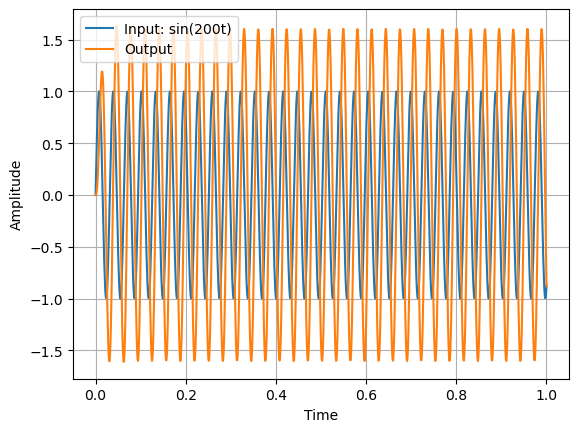

In [13]:
import numpy as np
import control
from control import forced_response
import matplotlib.pyplot as plt

x = 67028.47

# Define the transfer function coefficients
num = [x, 103*x, 1840*x]  # numerator coefficients
den = [1, 363, 360.81 + x , -(430.78-103*x), 1840*x]  # denominator coefficients



# Define the input signal
t = np.linspace(0, 1, 1000)  # Time vector
u = np.sin(200 * t)  # Input signal



H = control.tf(num, den)
print("The transfer function is : " ,H)


# Simulate the response
t, y = forced_response(H, T=t, U=u)

# Plot the input and output signals
plt.figure()
plt.plot(t, u, label='Input: sin(200t)')
plt.plot(t, y, label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()